# House Regression

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

### Read in Data

In [2]:
df = (
    pd.read_csv(Path("../Resources/USA_Housing.csv"))
    .set_index("Avg. Area Number of Rooms")
    .sort_index()
)
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Bedrooms,Area Population,Price,Address
Avg. Area Number of Rooms,,,,,,
3.236194,74277.719901,6.987280,3.42,50233.790310,1.365081e+06,"9835 Kimberly Street Suite 318\nMurphyview, ND..."
3.950225,66961.664415,7.412989,2.31,33423.293292,1.128720e+06,"456 Gray Extension Suite 249\nJeremyville, MA ..."


### Plot the Data

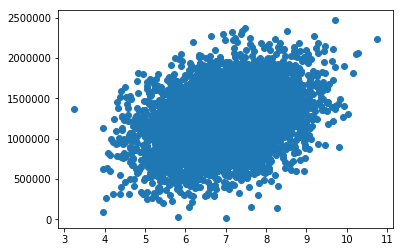

In [3]:
# Create a scatter plot of the data
plt.scatter(df.index, df.Price)

## Create a SciKitLearn Linear Regression Model

In [4]:
# Create a Linear Regression Model using sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Fit the Model to the Data

In [5]:
# Separate the data into the X and y components
# In this case, y will be the `Price` and X will be the remainign columns
X = df.index.values.reshape(-1,1)
y = df['Price']

In [6]:
# Fit the model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Make Predictions

In [7]:
# Make predictions using the X data
predicted_y_values = model.predict(X)
predicted_y_values

array([ 789978.22263127,  874120.76535933,  874208.90683047, ...,
       1612949.80474914, 1620034.49514083, 1676547.32853582])

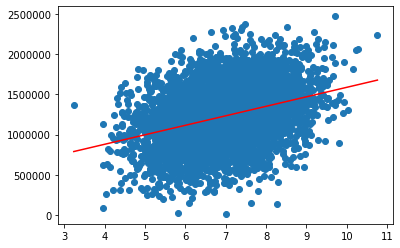

In [8]:
# Plot X and y as a scatter plot
# Plot X and the predictions as a red line plot
plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

### Extract the coef, intercept, and calculate the score of the model

In [9]:
model.coef_

array([117841.63757442])

In [10]:
model.intercept_

408619.81940216525

In [11]:
# R2 value
model.score(X, y, sample_weight=None)

0.11267062525400562